Name: Ibrahim Odumas Odufowora <br />
Course: Machine Learning <br />
Project Name: Classification with MNIST <br />

If the Latex formula are not showing correctly, please use chrome browser.

# Problems Identification:
This project involves the implementation of efficient and effective Logistic Regression classifiers on MNIST data set. The MNIST data comprises of digital images of several digits ranging from 0 to 9. Each image is 28 x 28 pixels. Thus, the data set has 10 levels of classes.

These are the needed packages:

In [47]:
import warnings
from scipy.stats import mode
import numpy as np
from mnist import MNIST
from time import time
import pandas as pd
import os
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=DeprecationWarning)
import random
plt.rcdefaults()
from IPython.display import display, HTML
from itertools import chain
from sklearn.metrics import confusion_matrix
from pylab import subplot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import pandas as pd
import numpy as np
from plotly.graph_objs import *
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter('ignore')

Load the dataset, having downloaded it from Yann. The train data set comprises of 60,000 samples and the test data set has 10,000 samples.

In [9]:
__mndata__ = MNIST(os.getcwd() +'\\image')
__train_image__, __train_label__ = __mndata__.load_training() #train & train_label
__test_image__, __test_label__ = __mndata__.load_testing() #test & test_label

The train and test images were reshaped to 784 dimension long, which translate to one feature for each pixel in the image.

### Visualization:
Visualizing a random 28 by 28 image.

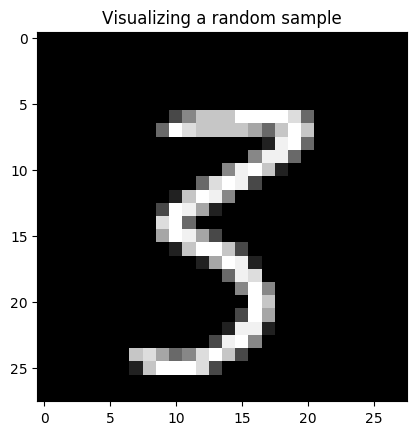

In [147]:
plt.imshow(np.reshape(train[random.randint(1,1000)], [28,28]), cmap='Greys_r'); plt.title('Visualizing a random sample'); plt.show()

### Implementation functions:

In [1]:
class Utility:
    """This class warehouses the data and other general functions"""
    def __init__(self):
        self.train = np.asarray([np.reshape(x, (784)) for x in __train_image__]).astype('float64') #change train_image to numpy array #784 means 28 by 28 pixel
        self.train_label = np.asarray(__train_label__)
        self.test = np.asarray([np.reshape(x, (784)) for x in __test_image__]).astype('float64') #change test_image to numpy array
        self.test_label = np.asarray(__test_label__)
        self.n_class = list(range(10)) #class labels
    
    def confusionMatrix(actual, predict, classV=list(range(10)), print_cfm=True, print_err_digit=True):
        cfm = pd.DataFrame(confusion_matrix(actual, predict))
        err_all = round((sum(np.diagonal(cfm)) / len(predict)) * 100, 4)
        error_digit = []
        for i in classV:
            error_digit.append(round(cfm.iloc[i, i] / sum(cfm.iloc[i, :]), 4) * 100)

        tab_error = pd.DataFrame(columns=['digit', 'Accuracy per digit in %'])
        tab_error['digit'] = classV
        tab_error['Accuracy per digit in %'] = error_digit

        if print_cfm:
            print('Testing Confusion Matrix: Actual vs. Prediction')
            display(cfm)

        if print_err_digit:
            print('% Accuracy per digit')
            display(tab_error)
            print('\nThe overall testing accuracy is {}%'.format(err_all))

        return cfm, tab_error, err_all
    
    def mutiplePlot(yValues, legend, title, xLabel, yLabel):
        plt.subplots(figsize=(10, 5))
        for i in range(len(yValues)):
            plt.semilogx(yValues[i], label=legend[i])
        plt.xlabel(xLabel)
        plt.ylabel(yLabel)
        #plt.xticks(comp, comp)
        plt.legend()
        plt.title(title)
        plt.show()
        
    def plot_(xValues, yValue, xlabel, ylabel, title, semilogx=False, semilogy=False):
        yValue = np.round(yValue, 4)
        if semilogx:
            plt.semilogx(xValues, yValue, '-gD', color='black')
        elif semilogy:
            plt.semilogy(xValues, yValue, '-gD', color='black')
        else:
            plt.plot(xValues, yValue, '-gD', color='black')
            #ax.set_xticks(xValues, xValues)
            
        ax = subplot(111)
        plt.ylabel(ylabel)
        plt.xlabel(xlabel)
        plt.title(title)
        plt.show()
        
    def images_plot(prob, imageData):
        classes = ["W - c=0", "W - c=1", "W - c=2","W - c=3", "W - c=4","W - c=5","W - c=6","W - c=7","W - c=8", "W - c=9"]
        if prob:
            classes = ["P(x|c=0)", "P(x|c=1)", "P(x|c=2)", "P(x|c=3)", "P(x|c=4)", "P(x|c=5)", "P(x|c=6)", "P(x|c=7)",
                   "P(x|c=8)", "P(x|c=9)"]

        num_classes = len(classes)
        plt.subplots(figsize=(15, 2))
        for y, cls in enumerate(classes):
            plt_idx = y + 1
            plt.subplot(1, num_classes, plt_idx)
            if prob:
                plt.imshow(imageData[y].reshape((28, 28)))
            else:
                plt.imshow(imageData[y].reshape(785, 1)[1:785].reshape((28, 28)))
            plt.axis("off")
            plt.title(cls)

        plt.tight_layout()
        plt.show()
        
#End of Class Utility

class Logistic_Regr:
    """This class warehouses the logistic regression classifier"""
    def normalize(self, features):
        return features / 255

    def logistic_regression(self, features, target, lambdaV, iteration):
        weights = np.reshape(np.ones(features.shape[1]), (1, features.shape[1]))
        iter = 1;
        dist = 1
        dist_all = []
        learning_rate = (0.05 / 60000)
        while dist > 0.0000001 and iter < iteration:
            old_weights = weights.copy()
            scores = np.dot(features, weights.T)
            scores_desc = np.multiply(target.T, scores)
            probs_desc = 1 / (1 + np.exp(-scores_desc))
            _probs_desc_1 = (1 - probs_desc).T
            _probs_desc_1_target = np.multiply(target, _probs_desc_1)
            grad_desc = - np.dot(_probs_desc_1_target, features)
            lamda_weight = (lambdaV * weights)
            grad_desc_lamda_weight = grad_desc + lamda_weight
            grad_desc_lamda_weight_smoth =  learning_rate * grad_desc_lamda_weight
            weights = weights - grad_desc_lamda_weight_smoth
            dist = np.linalg.norm(old_weights - weights)
            dist_all.append(dist)
            iter += 1

        return weights, dist_all

    def get_weights_pred(self, features, train_lb, lambdaV, test, test_lb, iteration, add_b=True):
        sta_time = time()
        if add_b:  #hstack ones# for w0
            features = np.asarray(np.hstack((np.matrix(np.ones(features.shape[0])).T, features)))
            test = np.asarray(np.hstack((np.matrix(np.ones(test.shape[0])).T, test)))

        features = self.normalize(features)
        test = self.normalize(test)
        weights_all = []
        dist_all = []
        probab = pd.DataFrame(index=range(test.shape[0]), columns=range(10))
        for c in range(10):
            tr_label = np.reshape(np.where(train_lb == c, 1, -1), (1, train_lb.shape[0]))
            logistic = self.logistic_regression(features, tr_label, lambdaV, iteration)
            weights = logistic[0]
            dist = logistic[1]
            weights_all.append(weights)
            dist_all.append(dist)
            scores = np.dot(test, weights.T)
            pred_prob = 1.0 / (1 + np.exp(-scores))
            probab.iloc[:, c] = pred_prob

        probability = np.asarray(probab)
        overall_pred_class = np.argmax(probability, axis=1)
        overall_err = 1 - np.sum([overall_pred_class == test_lb]) / len(test_lb)

        return {"weights": weights_all, "time": time() - sta_time, "prediction": overall_pred_class,
                      "probability": probability, "distance_iteration": dist_all, "overall_err": overall_err}
    
    def logistic_multlambda(self, train, train_lb, test, test_lb, lambdas, iteration):
        legends = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7',
                   'class 8', 'class 9']
        titl = 'Gradient Curves - Showing that the optimal weights were almost reached'
        result_all = []
        accuracy_all = []
        weight_all = []
        time_all = []
        for i, lambdaV in enumerate(lambdas):
            result = self.get_weights_pred(train, train_lb, lambdaV, test, test_lb, iteration=iteration)
            accuracy_all.append(1 - result['overall_err'])
            weight_all.append(result['weights'])
            time_all.append(result['time'])
            result_all.append(result) 
        return {'result_all':result_all, 'accuracy_all':accuracy_all, 'weight_all':weight_all, 'time_all':time_all}
    
    def logistic_multlambda_plots(self, lambdas, test_lb, result):
        legends = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7',
                   'class 8', 'class 9']
        titl = 'Gradient Curves - Showing that the optimal weights were almost reached'
        for i, lambdaV in enumerate(lambdas):
            print('\n\033[2;40;46m                        RESULTS FOR LAMBDA = {}                        \033[0;40;46m'.format(lambdaV))
            dist_all = result['result_all'][i]['distance_iteration']
            Utility.mutiplePlot(dist_all, legends, titl, 'Epochs', 'Loss')
            prediction = result['result_all'][i]['prediction']
            conf_matix = Utility.confusionMatrix(test_lb, prediction)
            print('\nImages of each 10 trained classiers: ')
            weights = result['result_all'][i]['weights']
            Utility.images_plot(False, weights)


# L2 Regularized Logistic Regression: 
I implemented a regularized logistic regression classifier and presented the testing accuracy for each digit in a table.

Below are the implemention explanations:

$$ P(y \ = +1 \ | \ X) =  \frac{1}{1 \ + exp(-yW^{T}X)} $$

Thus, 

$$ P(y \ = -1 \ | \ X) = 1 - P(y \ = +1 \ | \ X)  = \frac{1}{1 \ + exp(yW^{T}X)} $$

Learn parameter W by Maximum Likelihood Estimation (MLE):
$$P(y \ | \ X) =  \prod_{i=1}^{N} \frac{1}{1 \ + exp(-yW^{T}X)} $$

Taking logarithm of likelihood:
$$ln \ P(y \ | \ X) = - \sum_{i=1}^{N} ln \left \{   1 \ + exp(-y_{i}W^{T}X_{i})\right \} $$

$$w^{*} = \min_{w} \sum_{i=1}^{N} ln \left \{   1 \ + exp(-y_{i}W^{T}X_{i})\right \} $$

Thus, adding ridge regularization to the loss function yields:
$$L(w) =  \sum_{i=1}^{N} ln \left \{   1 \ + exp(-y_{i}W^{T}X_{i})\right \} + \frac{\lambda}{2}|W|_{2}^{2}$$

The regularization favors small weights, guarantee bounded norm of W, and it provides a unique solution for W.

$$\nabla L(w) =  \sum_{i=1}^{N} \frac{-y_{i}X_{i} \ exp(-y_{i}W^{T}X_{i})}{1 \ + exp(-y_{i}W^{T}X_{i})} \ + \ \lambda W$$

Further simplification result to:
$$\nabla L(w) = - \sum_{i=1}^{N} y_{i}X_{i}(1 \ - \ p(y_{i}|X_{i})) \  + \ \lambda W \ \ \\where \ p(y_{i}|X_{i}) \ is \ the \ classification \ error.$$

Finally, 

$$W_{t+1} = W_{t} \ - \ \eta_{t} \nabla L(w) \\where \ \eta_{t} \ is \ the \ learning \ rate$$

In order to obtain optimal weights with minimal iterations(epoch), learning rate was set at 0.05 divided by the number of training samples.

I modeled the ridge regularization logistic regression above, and various values of lambda were used. The results corresponding to each lambda value were presented, these include: overall testing accuracy, confusion matrix, accuracy per digit, gradient descent curve, and images of weights. 

Finally, as requested I plotted the lambda values versus overall test accuracy (not error).

Note: iteration was set at 10000 because of time constraint and low processing speed of my machine. Apparently, better accuracy would be achieved with a highger number of iteration. Specifically, for lambda = 0.0001, accuracy was close to 92% with 15000 iterations, however, it almost runs forever on my machine(low processing speed). Logistic regression seem to work better on a scaled dataset, hence, the train and test set were scaled between zero and one by dividing through by 255(which is the maximum value in the dataset).

In [4]:
logistic = Logistic_Regr()
util = Utility()
lambdas = [0.0001, 1, 10, 100, 1000, 10000, 100000]

### Lambdas values of 0.0001, 1, 10, 100, 1000, 10000, & 100000 were applied to the classifier, and the results corresponding to each of them are presented below:

In [5]:
result_mult_lamdas = logistic.logistic_multlambda(util.train, util.train_label, util.test, util.test_label, lambdas, 10000)


                        RESULTS FOR LAMBDA = 0.0001                        


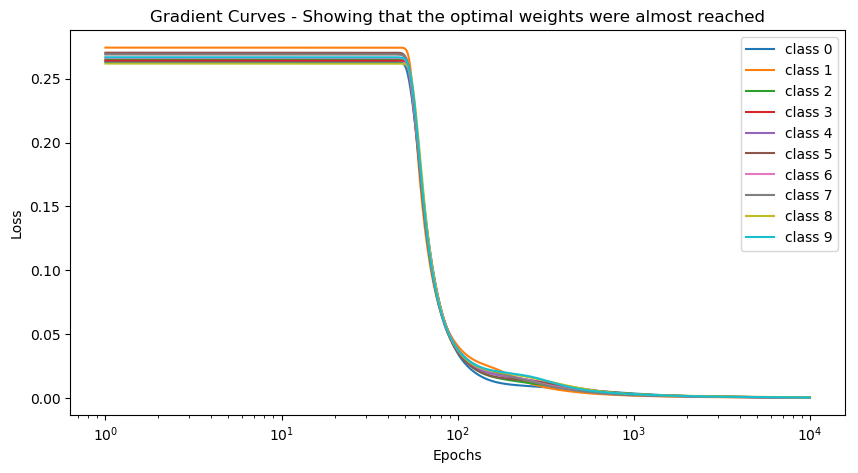

Testing Confusion Matrix: Actual vs. Prediction


,0,1,2,3,4,5,6,7,8,9
0,961,0,1,3,0,0,8,1,6,0
1,0,1095,3,3,0,2,4,1,26,1
2,6,1,911,18,11,1,14,18,46,6
3,3,0,22,918,2,22,4,9,22,8
4,2,1,8,0,900,0,9,1,16,45
5,17,5,4,43,10,735,19,8,41,10
6,11,3,3,3,10,11,906,0,11,0
7,5,9,28,7,7,1,4,934,5,28
8,8,4,6,21,12,28,12,11,866,6
9,8,7,5,16,39,11,0,26,16,881


% Accuracy per digit


,digit,Accuracy per digit in %
0,0,98.06
1,1,96.48
2,2,88.28
3,3,90.89
4,4,91.65
5,5,82.40
6,6,94.57
7,7,90.86
8,8,88.91
9,9,87.31



The overall testing accuracy is 91.07%

Images of each 10 trained classiers: 


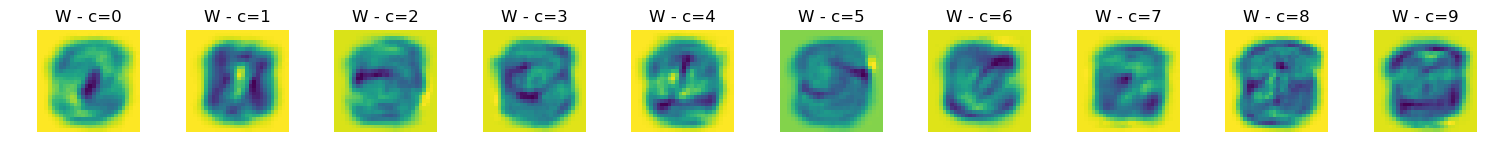


                        RESULTS FOR LAMBDA = 1                        


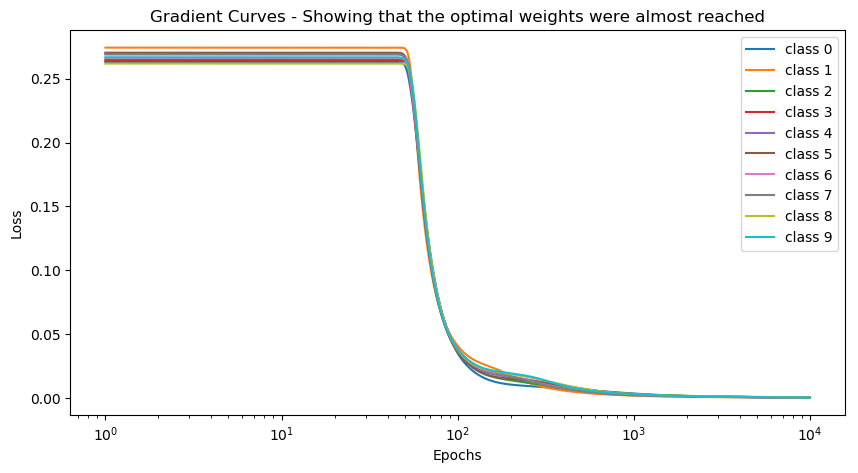

Testing Confusion Matrix: Actual vs. Prediction


,0,1,2,3,4,5,6,7,8,9
0,961,0,1,3,0,0,8,1,6,0
1,0,1095,3,3,0,2,4,1,26,1
2,6,1,911,18,11,1,14,18,46,6
3,3,0,22,918,2,22,4,9,22,8
4,2,1,8,0,900,0,9,1,16,45
5,17,5,4,43,10,735,19,8,41,10
6,11,3,3,3,10,11,906,0,11,0
7,5,9,28,7,7,1,4,934,5,28
8,8,4,6,21,12,28,12,11,866,6
9,8,7,5,16,39,11,0,26,16,881


% Accuracy per digit


,digit,Accuracy per digit in %
0,0,98.06
1,1,96.48
2,2,88.28
3,3,90.89
4,4,91.65
5,5,82.40
6,6,94.57
7,7,90.86
8,8,88.91
9,9,87.31



The overall testing accuracy is 91.07%

Images of each 10 trained classiers: 


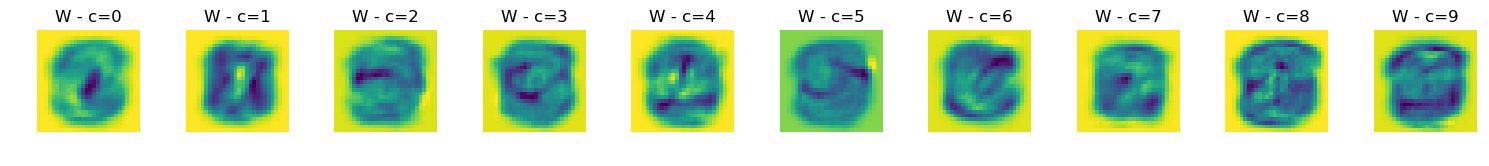


                        RESULTS FOR LAMBDA = 10                        


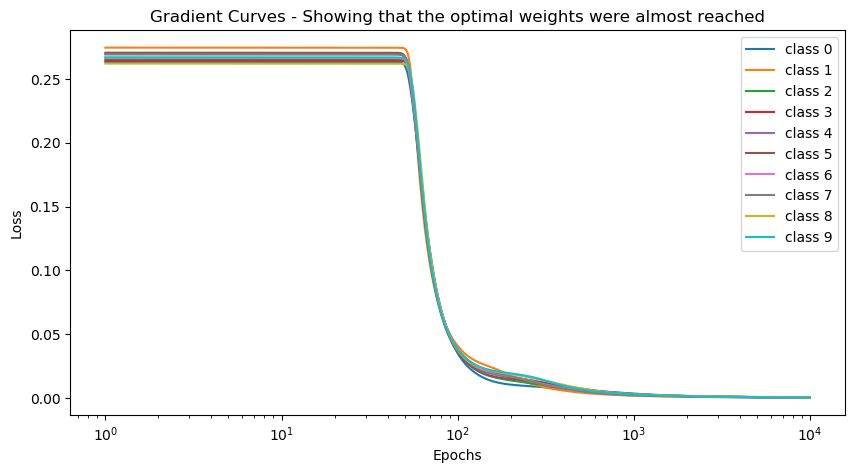

Testing Confusion Matrix: Actual vs. Prediction


,0,1,2,3,4,5,6,7,8,9
0,961,0,1,3,0,0,8,1,6,0
1,0,1095,3,3,0,2,4,1,26,1
2,6,1,911,18,11,1,14,18,46,6
3,3,0,22,918,2,22,4,9,22,8
4,2,1,8,0,901,0,9,1,15,45
5,17,5,4,43,10,735,19,8,41,10
6,11,3,3,3,10,11,906,0,11,0
7,5,9,28,7,7,1,4,934,5,28
8,8,4,6,21,12,28,12,12,865,6
9,8,7,5,16,40,10,0,26,16,881


% Accuracy per digit


,digit,Accuracy per digit in %
0,0,98.06
1,1,96.48
2,2,88.28
3,3,90.89
4,4,91.75
5,5,82.40
6,6,94.57
7,7,90.86
8,8,88.81
9,9,87.31



The overall testing accuracy is 91.07%

Images of each 10 trained classiers: 


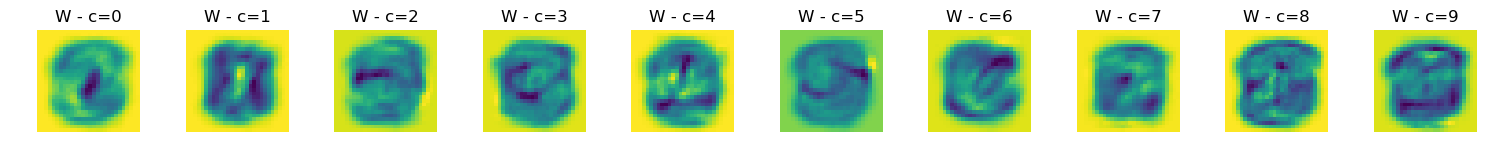


                        RESULTS FOR LAMBDA = 100                        


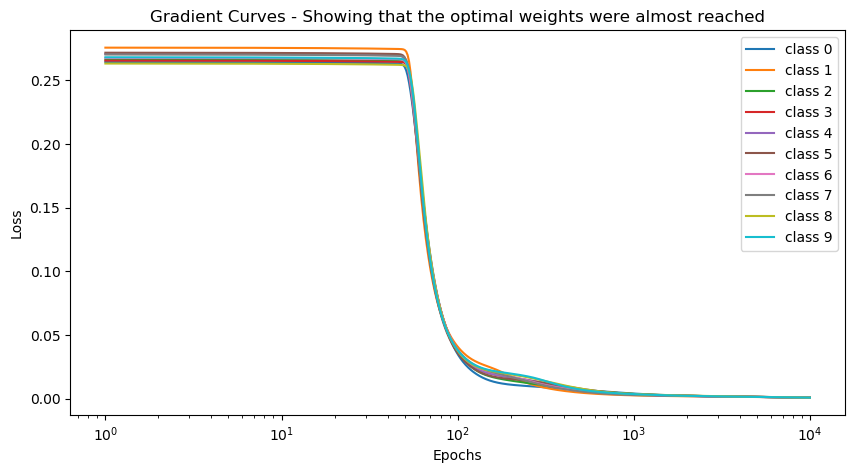

Testing Confusion Matrix: Actual vs. Prediction


,0,1,2,3,4,5,6,7,8,9
0,961,0,1,1,0,0,10,1,6,0
1,0,1101,3,2,0,1,4,2,22,0
2,6,4,905,20,11,1,14,18,46,7
3,3,0,22,915,1,23,5,9,23,9
4,1,1,7,0,906,0,9,1,12,45
5,17,4,3,43,14,727,19,10,43,12
6,10,3,4,2,10,10,910,2,7,0
7,4,14,27,6,7,1,2,931,4,32
8,9,9,8,19,10,24,14,15,858,8
9,10,10,5,18,40,7,0,26,12,881


% Accuracy per digit


,digit,Accuracy per digit in %
0,0,98.06
1,1,97.00
2,2,87.69
3,3,90.59
4,4,92.26
5,5,81.50
6,6,94.99
7,7,90.56
8,8,88.09
9,9,87.31



The overall testing accuracy is 90.95%

Images of each 10 trained classiers: 


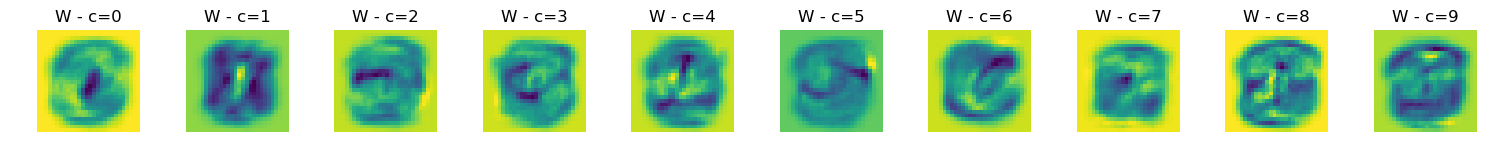


                        RESULTS FOR LAMBDA = 1000                        


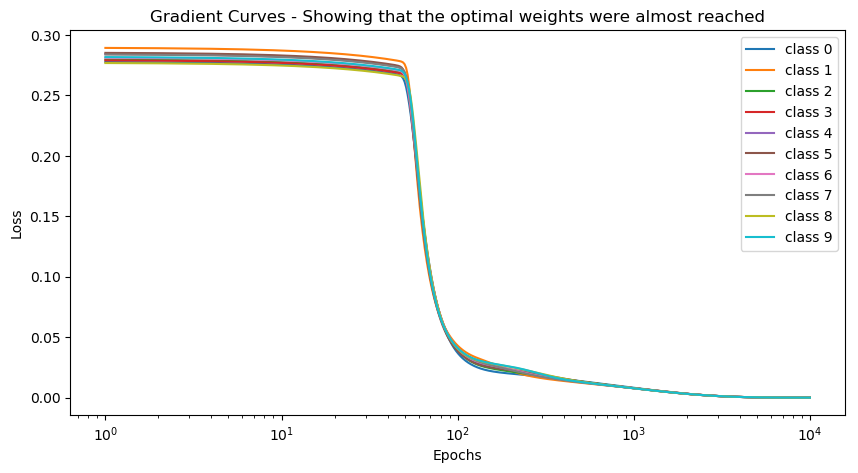

Testing Confusion Matrix: Actual vs. Prediction


,0,1,2,3,4,5,6,7,8,9
0,956,0,2,2,0,0,11,1,8,0
1,0,1104,2,3,1,0,4,1,20,0
2,11,14,869,21,17,0,19,19,54,8
3,6,1,19,902,1,23,8,14,24,12
4,1,7,4,1,888,1,13,1,14,52
5,18,8,3,63,20,671,22,13,59,15
6,15,3,4,1,9,12,902,1,11,0
7,2,26,24,2,10,0,4,917,6,37
8,10,14,9,32,10,26,15,16,828,14
9,14,10,8,15,43,10,1,35,12,861


% Accuracy per digit


,digit,Accuracy per digit in %
0,0,97.55
1,1,97.27
2,2,84.21
3,3,89.31
4,4,90.43
5,5,75.22
6,6,94.15
7,7,89.20
8,8,85.01
9,9,85.33



The overall testing accuracy is 88.98%

Images of each 10 trained classiers: 


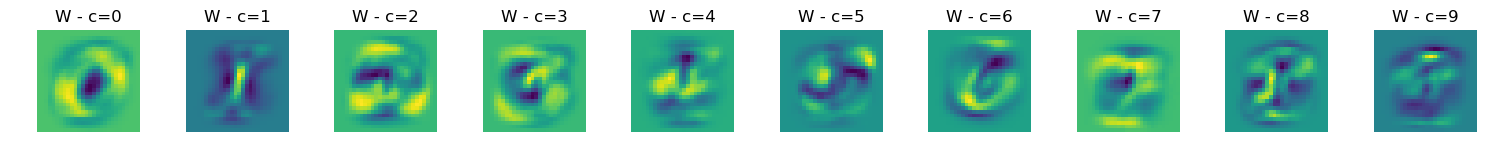


                        RESULTS FOR LAMBDA = 10000                        


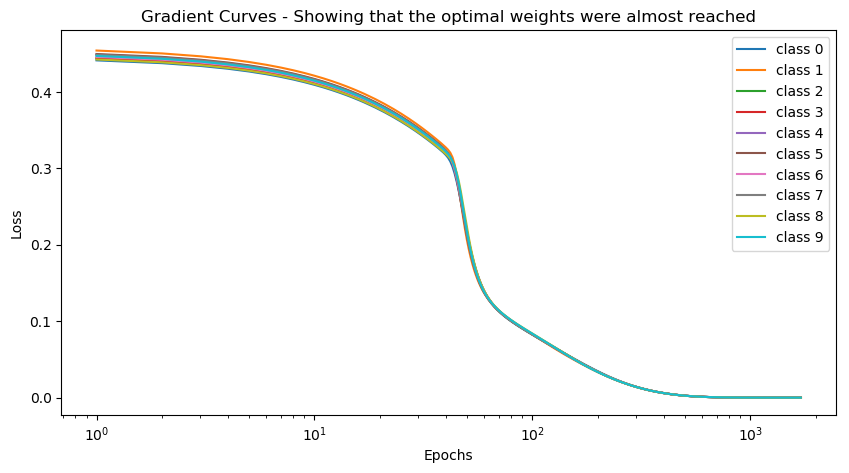

Testing Confusion Matrix: Actual vs. Prediction


,0,1,2,3,4,5,6,7,8,9
0,947,0,2,4,0,1,16,1,9,0
1,0,1086,6,3,1,0,4,1,34,0
2,18,38,820,33,17,0,33,23,45,5
3,8,4,24,893,1,10,8,19,31,12
4,3,12,5,1,843,0,21,2,20,75
5,40,25,8,160,26,504,37,16,58,18
6,23,5,12,2,9,14,886,0,7,0
7,6,42,26,0,13,0,4,888,11,38
8,14,32,12,60,10,10,18,16,785,17
9,20,15,13,16,56,5,5,46,14,819


% Accuracy per digit


,digit,Accuracy per digit in %
0,0,96.63
1,1,95.68
2,2,79.46
3,3,88.42
4,4,85.85
5,5,56.50
6,6,92.48
7,7,86.38
8,8,80.60
9,9,81.17



The overall testing accuracy is 84.71%

Images of each 10 trained classiers: 


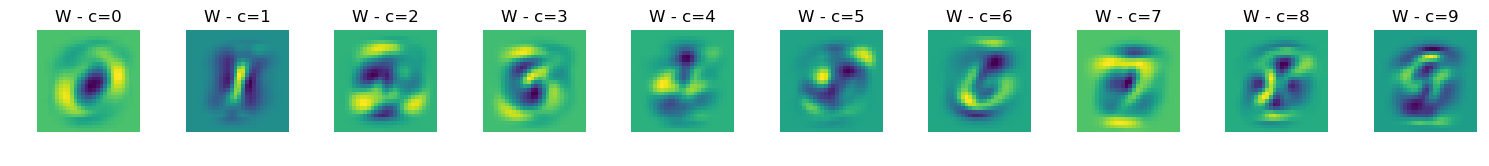


                        RESULTS FOR LAMBDA = 100000                        


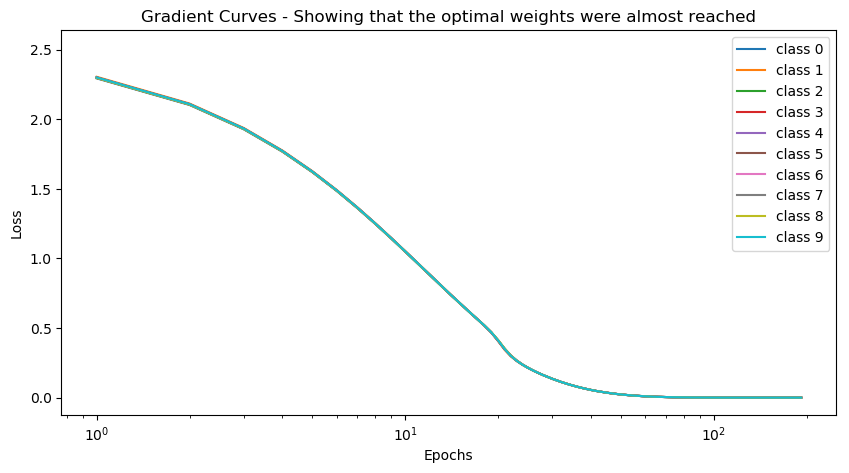

Testing Confusion Matrix: Actual vs. Prediction


,0,1,2,3,4,5,6,7,8,9
0,954,0,2,4,0,0,12,1,7,0
1,0,1074,14,8,0,0,4,1,34,0
2,57,39,780,48,12,0,37,20,38,1
3,25,6,21,894,0,0,9,19,28,8
4,12,15,6,4,769,0,44,3,24,105
5,188,36,14,283,17,148,47,36,93,30
6,72,14,15,2,4,2,844,0,5,0
7,20,51,29,1,5,0,3,883,13,23
8,40,30,16,124,4,0,21,21,704,14
9,39,21,13,20,53,0,5,72,24,762


% Accuracy per digit


,digit,Accuracy per digit in %
0,0,97.35
1,1,94.63
2,2,75.58
3,3,88.51
4,4,78.31
5,5,16.59
6,6,88.10
7,7,85.89
8,8,72.28
9,9,75.52



The overall testing accuracy is 78.12%

Images of each 10 trained classiers: 


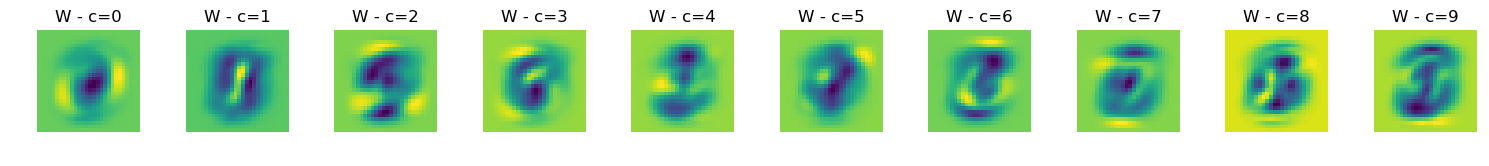

In [33]:
logistic = Logistic_Regr()
plot_mult_lambdas = logistic.logistic_multlambda_plots(lambdas, util.test_label, result_mult_lamdas)

### Finally, below is the plot of overall test accuracy vs lambda [0.0001, 1, 10, 100, 1000, 10000, 100000]:

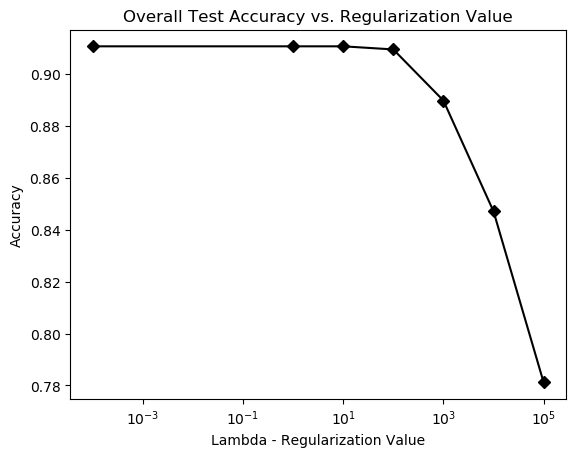

In [48]:
Utility.plot_(lambdas, result_mult_lamdas['accuracy_all'], 'Lambda - Regularization Value', 'Accuracy', 'Overall Test Accuracy vs. Regularization Value', True)

The results above are for lambdas = [0.0001, 1, 10, 100, 1000, 10000, 100000], I discovered that at a very high iteration, a relatively small lambda value works best. I simulated this for 5000 iterations and a high lambda value was better. However, high iteration implies reaching the bottom of the gradient descent and it also gives optimal performance.

Thus, I chose to use an iteration of 10000, with the lambda values above. It can be noticed that the result are almost the same for lambdas = 0.00001, 1, 10, this is mainly attributed to the effect of the high iteration, the same optimal values of weights were reached. The accuracy starts degrading as lambda goes beyond 10, this could be because the optimal values of weights could not be achieved. Thus, lambda values of 0.0001, 1, or 10 are preferable with an iteration of 10000 and a learning of 0.05 divided by the number of samples in the train set.

###### Looking at the case were lambda is 0.0001 - best lamda value:

The overall testing accuracy is 91.07%. The classier almost perfectly predict digits 0 and 1 with an accuracy of 98.06% and 96.48% respectively. However, the classifier doesn't match same performance in predicting digits 5, 2, 9 & 8. Most digit 5 are either classified as 3 or 8, this might be because digit 5 has a shape that looks like 8 and 3.

A key observation is that, in all the results of the various lambdas, digit 5 has the lowest accuracy. Thus, it seems that logistic regression doesn't effectively classify digit 5.

The gradient descent curves show that the optimal values of weights were almost achieved.

The sharpness of the images reduces as lambda goes beyond its optimal value. The images for lambda 0.0001 are brighter than those of lambda 100000. The classifier practically model the class image.

###### Future work:

Testing the effectiveness of PCA on regularized logistic regression.